In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [31]:
raw_df=pd.read_csv("/content/drive/MyDrive/machine learning projects/training set/BitCoin/btc_historical_price.csv")

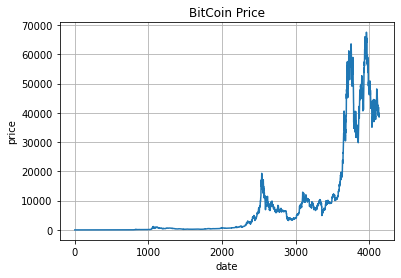

In [32]:
plt.title('BitCoin Price')
plt.xlabel('date')
plt.ylabel('price')
plt.grid()
plt.plot(raw_df['price'])
plt.show()

In [33]:
raw_df.describe()

,price
count,4138.000000
mean,8171.597715
std,14708.448355
min,0.295000
25%,198.788600
50%,712.689000
75%,8601.169600
max,67544.873300


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_cols=['price']
scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

In [35]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size]) #슬라이싱을 이용하여 2차원의 모양의 feature을 생성
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list) #생성한 feature을 numpy로 만들어주어서 (batch size, time steps, input dims)의 3차원 형태를 가짐

In [36]:
# feature_df, label_df 생성

feature_cols = [ 'date','price' ]
label_cols = [ 'price' ]

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

In [37]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(4138, 2) (4138, 1)


In [38]:
window_size = 40  #40개의 데이터를 통해 뒤에있는 데이터를 구하겠다는 뜻

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(4098, 40, 2) (4098, 1)


In [39]:
# train, test 분리

#split = int(len(X)*0.95)
split = -778

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3320, 40, 2) (3320, 1)
(778, 40, 2) (778, 1)


In [40]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=x_train[0].shape))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 40, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=100, batch_size=16,
          callbacks=[early_stop])

Epoch 1/100
208/208 [==============================] - 15s 45ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
208/208 [==============================] - 8s 41ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
208/208 [==============================] - 8s 41ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
208/208 [==============================] - 8s 40ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
208/208 [==============================] - 13s 62ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan


In [ ]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

NameError: ignored

In [ ]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('price')
plt.xlabel('date')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()